# 📈 Monte Carlo Portfolio Optimization for Indian Stock Market

**A comprehensive implementation of Modern Portfolio Theory using Monte Carlo simulation to discover optimal asset allocation strategies for Indian equity markets.**

## 🎯 Project Overview
This notebook demonstrates quantitative portfolio optimization using **100,000 Monte Carlo simulations** to find the most efficient allocation across 20 major Indian stocks listed on NSE. The approach combines statistical modeling with real market data to maximize risk-adjusted returns.

## ✨ Key Features:
- **🔍 Risk-Return Optimization** - Maximize returns while minimizing portfolio volatility
- **📊 Efficient Frontier Visualization** - Interactive plots showing optimal risk-return combinations  
- **⚡ Sharpe Ratio Maximization** - Find portfolios with best risk-adjusted performance
- **🔗 Covariance Matrix Analysis** - Understanding stock correlations for diversification
- **✅ Out-of-sample Backtesting** - Validate optimization results on unseen data using manual calculation methods (alternative to backtrader for compatibility)
- **📈 Performance Analytics** - Comprehensive risk metrics and drawdown analysis

## 🚀 Methodology:
1. **Data Collection**: Download 3 years of historical price data for 20 diverse NSE stocks
2. **Statistical Analysis**: Calculate daily returns, covariance matrices, and correlation structures
3. **Monte Carlo Simulation**: Generate 100,000 random portfolio weight combinations
4. **Optimization**: Identify portfolio with maximum Sharpe ratio (risk-adjusted return)
5. **Validation**: Test optimal allocation on recent 6-month out-of-sample data
6. **Performance Analysis**: Compare against equal-weight benchmark with detailed metrics
7. **Backtesting Framework**: Custom portfolio validation system (replaces backtrader for better compatibility)

## 📋 Portfolio Universe:
**20 Major Indian Stocks** across diverse sectors including Technology (TCS, Infosys), Banking (HDFC, ICICI), Consumer Goods (Hindustan Unilever), Energy (Reliance), and more - ensuring broad market representation and reduced concentration risk.

---
*Built with Python, pandas, numpy, yfinance, and matplotlib for robust quantitative analysis*

In [190]:
# Import required libraries for data analysis and visualization
import yfinance as yf
import pandas as pd
import numpy as np

In [191]:
# Select 20 major Indian stocks from different sectors for diversification
data = {}
tickers = [
    'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'INFY.NS',
    'SBIN.NS', 'BHARTIARTL.NS', 'ITC.NS', 'HINDUNILVR.NS', 'LT.NS',
    'BAJFINANCE.NS', 'MARUTI.NS', 'HCLTECH.NS', 'TATAMOTORS.NS', 'SUNPHARMA.NS',
    'TITAN.NS', 'AXISBANK.NS', 'NTPC.NS', 'ULTRACEMCO.NS', 'M&M.NS'
]

print(f"Downloading data for {len(tickers)} Indian stocks...")

In [192]:
# Download 10 years of historical data for each stock
for ticker in tickers:
    temp_data = yf.download(ticker, period='3y', progress=False, auto_adjust=True)
    
    # Extract the Close prices as a Series with the ticker name
    data[ticker] = temp_data['Close']

In [193]:
# Clean and organize stock data into a single DataFrame
stock_series = {}
for ticker, df in data.items():
    stock_series[ticker] = df['Close'] if 'Close' in df.columns else df.iloc[:, 0]

stock_data = pd.DataFrame(stock_series)
stock_data.columns = [col.replace('.NS', '') for col in stock_data.columns]

# Check for missing values
missing_data = stock_data.isnull().sum()
print(missing_data[missing_data > 0] if missing_data.sum() > 0 else "No missing values found")

No missing values found


In [194]:
stock_data.head()

,RELIANCE,TCS,HDFCBANK,ICICIBANK,INFY,SBIN,BHARTIARTL,ITC,HINDUNILVR,LT,BAJFINANCE,MARUTI,HCLTECH,TATAMOTORS,SUNPHARMA,TITAN,AXISBANK,NTPC,ULTRACEMCO,M&M
Date,,,,,,,,,,,,,,,,,,,,
2022-11-28,1235.987427,3108.613037,769.988708,914.752991,1488.864624,575.594727,822.078979,306.735168,2390.071289,2006.589966,667.388123,8723.917969,995.699463,425.587280,1005.016235,2567.723633,889.343994,154.289886,6777.534180,1218.939331
2022-11-29,1238.110107,3110.535645,768.833923,923.877075,1494.046387,575.547485,820.557251,308.764709,2493.238525,1993.079590,663.124268,8650.905273,1004.732422,425.489044,1019.682434,2589.020508,890.191711,154.063538,6813.524902,1225.176758
2022-11-30,1246.852051,3104.538818,773.934204,929.878540,1499.457397,569.778259,833.221313,306.690094,2540.705078,2016.698486,661.824463,8712.994141,997.479553,431.628540,1015.991455,2627.898926,898.868774,155.919739,6959.158691,1272.445068
2022-12-01,1243.177124,3182.225586,779.251160,917.485352,1519.771606,575.121887,833.073975,306.284119,2520.355713,2045.274414,664.463562,8697.459961,1011.362854,430.498871,1016.380066,2613.734375,901.461853,155.919739,7152.878906,1260.603760
2022-12-02,1242.652222,3148.807373,773.284729,908.117249,1502.162842,574.601685,833.123108,304.119263,2475.160645,2027.049805,657.373596,8559.299805,1010.606323,427.699280,1010.115417,2593.131104,902.758484,155.874466,7116.543457,1232.486450


In [195]:
# Calculate daily percentage returns for each stock
daily_returns = stock_data.pct_change().dropna()

In [196]:
daily_returns

,RELIANCE,TCS,HDFCBANK,ICICIBANK,INFY,SBIN,BHARTIARTL,ITC,HINDUNILVR,LT,BAJFINANCE,MARUTI,HCLTECH,TATAMOTORS,SUNPHARMA,TITAN,AXISBANK,NTPC,ULTRACEMCO,M&M
Date,,,,,,,,,,,,,,,,,,,,
2022-11-29,0.001717,0.000618,-0.001500,0.009974,0.003480,-0.000082,-0.001851,0.006617,0.043165,-0.006733,-0.006389,-0.008369,0.009072,-0.000231,0.014593,0.008294,0.000953,-0.001467,0.005310,0.005117
2022-11-30,0.007061,-0.001928,0.006634,0.006496,0.003622,-0.010024,0.015433,-0.006719,0.019038,0.011850,-0.001960,0.007177,-0.007219,0.014429,-0.003620,0.015017,0.009747,0.012048,0.021374,0.038581
2022-12-01,-0.002947,0.025024,0.006870,-0.013328,0.013548,0.009378,-0.000177,-0.001324,-0.008009,0.014170,0.003988,-0.001783,0.013918,-0.002617,0.000382,-0.005390,0.002885,0.000000,0.027837,-0.009306
2022-12-02,-0.000422,-0.010502,-0.007657,-0.010211,-0.011586,-0.000905,0.000059,-0.007068,-0.017932,-0.008911,-0.010670,-0.015885,-0.000748,-0.006503,-0.006164,-0.007883,0.001438,-0.000290,-0.005080,-0.022305
2022-12-05,-0.014584,-0.003853,0.003640,0.003224,0.001129,0.016048,-0.005361,-0.001186,0.001816,0.000048,-0.002292,-0.002700,-0.004139,-0.015273,-0.000577,-0.000859,-0.006573,0.017427,-0.005313,-0.003796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-24,-0.006918,-0.002984,0.001102,-0.000803,0.001942,-0.002056,-0.004901,-0.010543,-0.003904,-0.002882,-0.010059,-0.001189,0.001493,-0.010904,0.000618,-0.007658,-0.005330,-0.009796,-0.012363,-0.015682
2025-11-25,0.002474,-0.007004,-0.009358,-0.007746,-0.011240,0.013394,0.004414,-0.006815,-0.004166,-0.004136,-0.007847,-0.004324,-0.005775,-0.016327,-0.002246,-0.004956,-0.002128,0.000773,-0.000345,-0.005825
2025-11-26,0.019614,0.014010,0.014245,0.012668,0.017836,0.000305,-0.016099,0.003743,0.004598,0.016338,0.024843,0.016804,0.010493,0.019293,0.015815,0.011050,0.018874,0.007414,0.015458,0.004660


In [197]:
# Calculate annualized covariance matrix (252 trading days per year)
cov_matrix = daily_returns.cov() * 252

In [198]:
print(cov_matrix.head())

           RELIANCE       TCS  HDFCBANK  ICICIBANK      INFY      SBIN  \
RELIANCE   0.040512  0.011154  0.013492   0.013779  0.012269  0.022407   
TCS        0.011154  0.039246  0.005326   0.006325  0.033112  0.008703   
HDFCBANK   0.013492  0.005326  0.034147   0.015104  0.008559  0.015791   
ICICIBANK  0.013779  0.006325  0.015104   0.031566  0.009932  0.018788   
INFY       0.012269  0.033112  0.008559   0.009932  0.056506  0.009233   

           BHARTIARTL       ITC  HINDUNILVR        LT  BAJFINANCE    MARUTI  \
RELIANCE     0.014336  0.011263    0.006078  0.020393    0.016043  0.012942   
TCS          0.008971  0.006019    0.006318  0.011930    0.010215  0.006490   
HDFCBANK     0.008838  0.005513    0.003585  0.015055    0.015498  0.007153   
ICICIBANK    0.011882  0.007661    0.002404  0.014284    0.014600  0.007802   
INFY         0.012596  0.006267    0.008143  0.013437    0.012677  0.007237   

            HCLTECH  TATAMOTORS  SUNPHARMA     TITAN  AXISBANK      NTPC  \
RELI

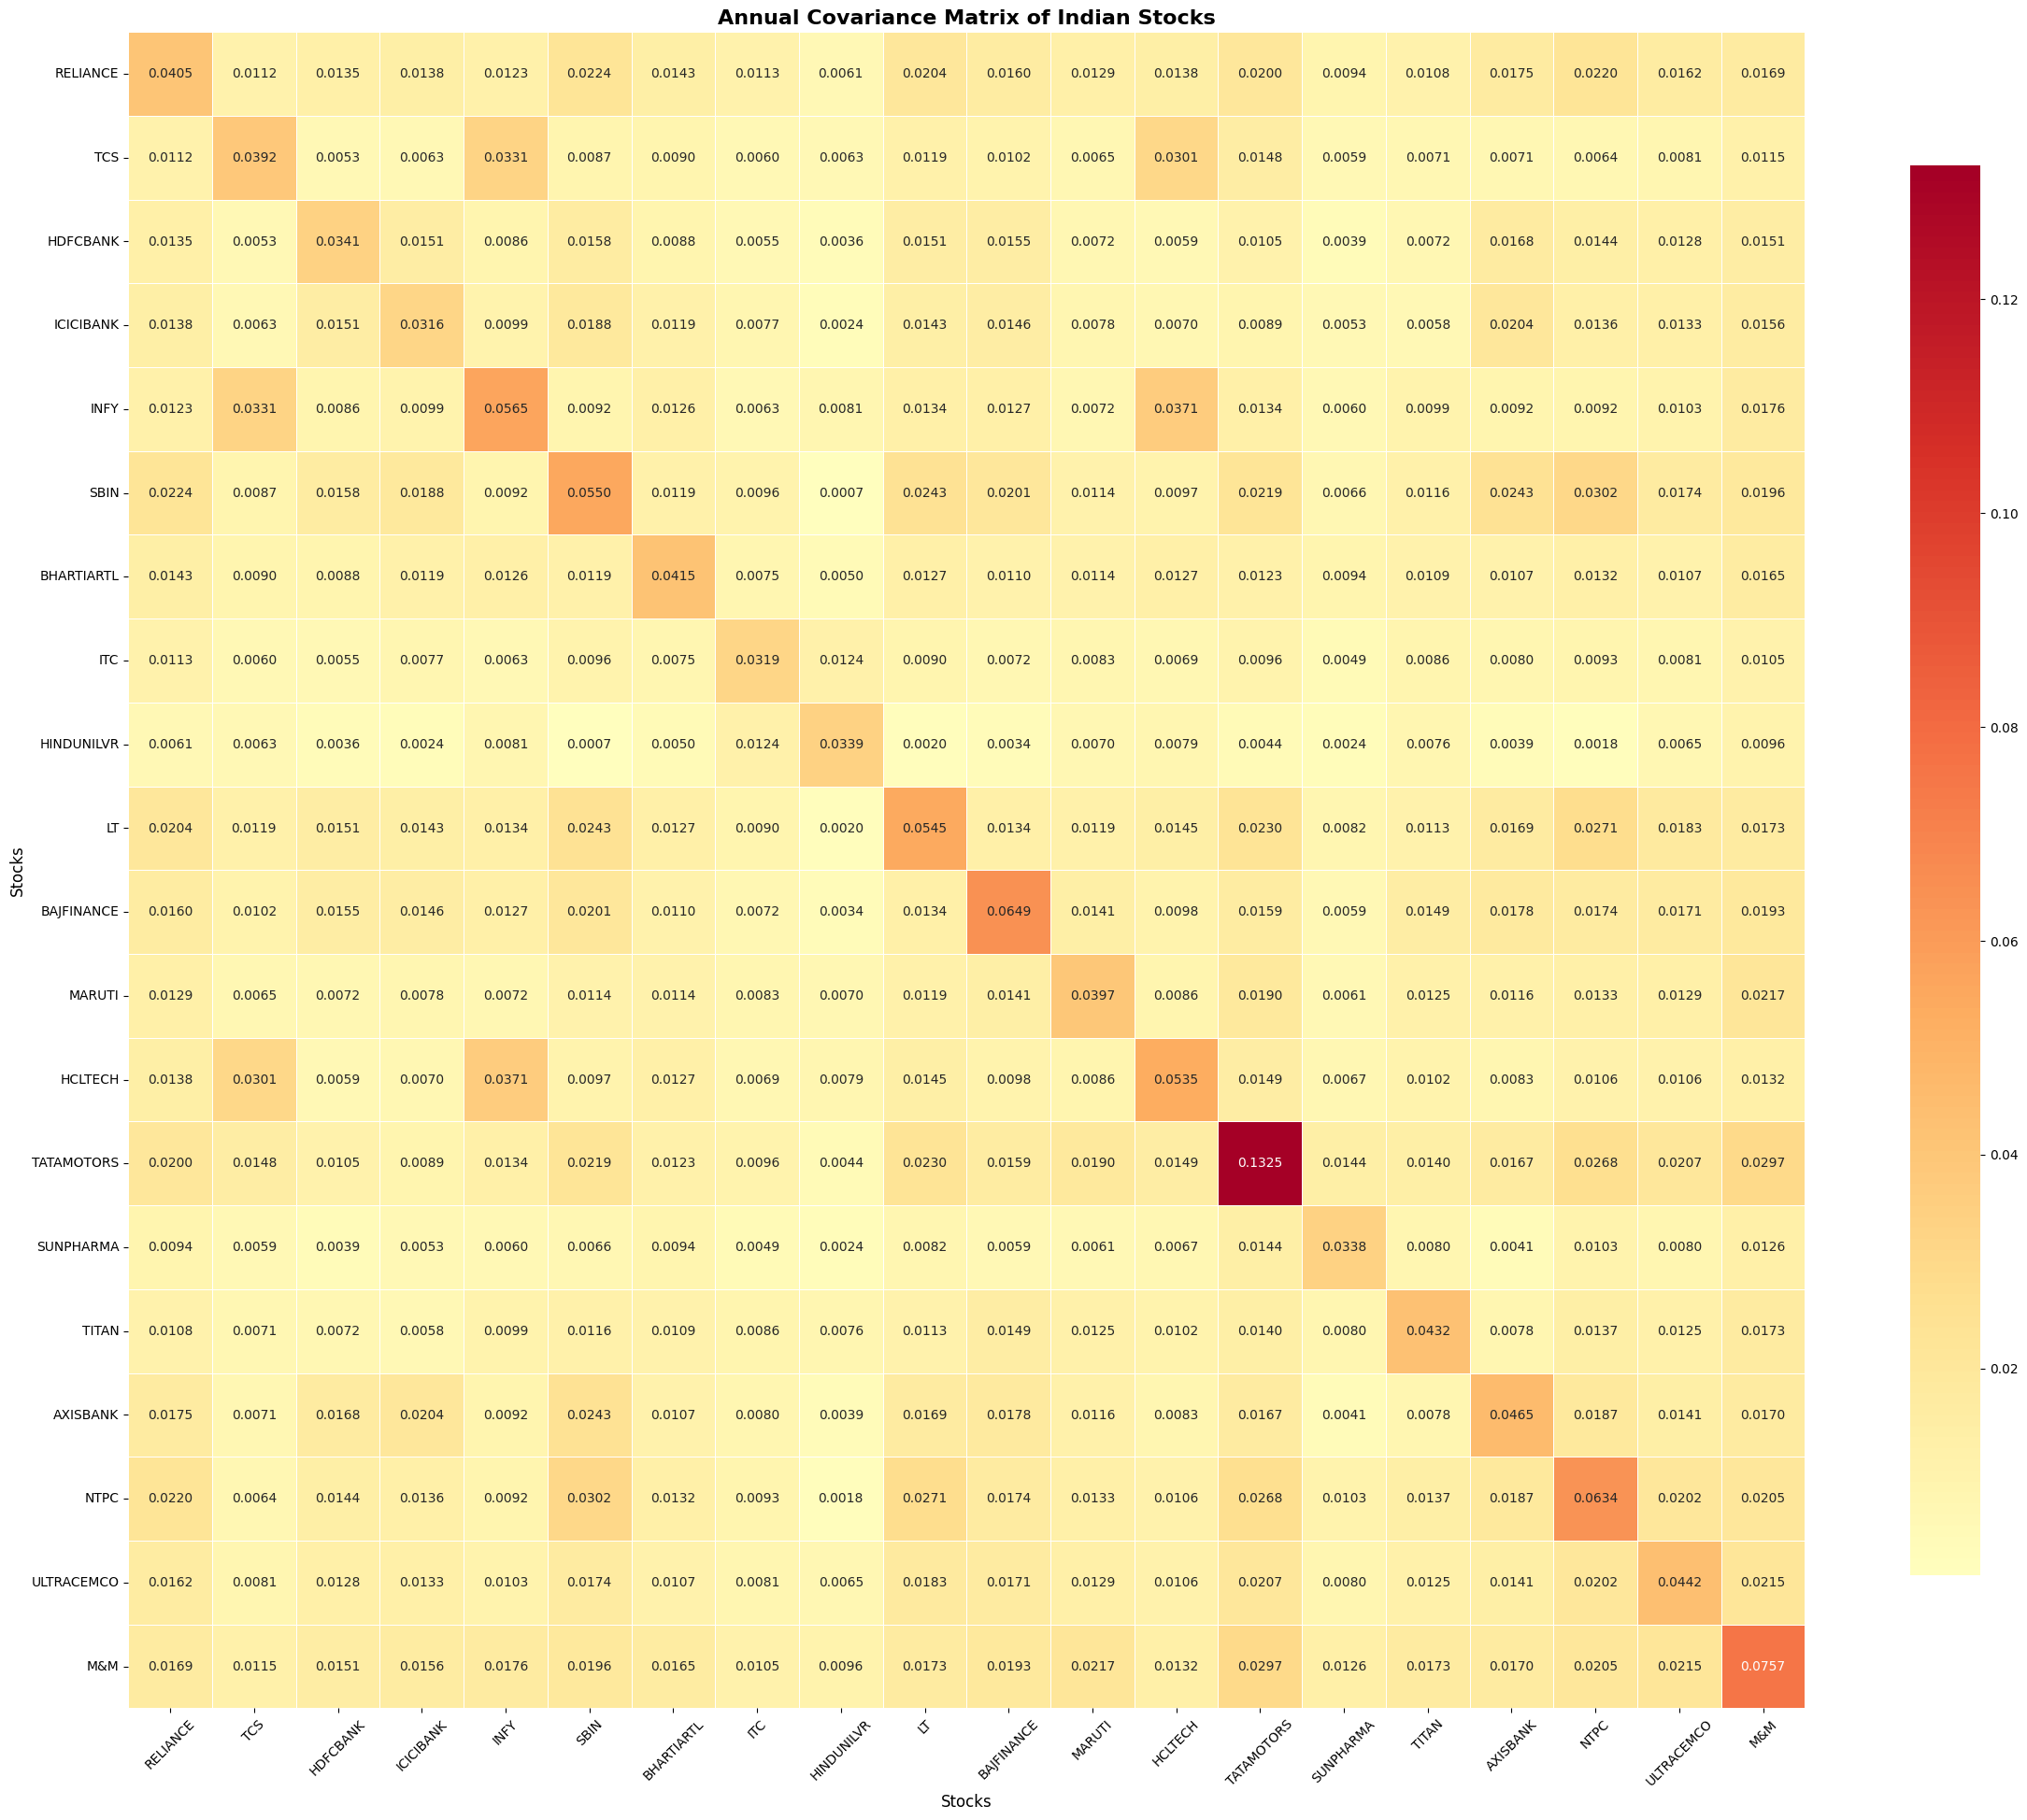

Covariance Matrix Shape: (20, 20)

Diagonal values (variances):
[0.0405 0.0392 0.0341 0.0316 0.0565 0.055  0.0415 0.0319 0.0339 0.0545
 0.0649 0.0397 0.0535 0.1325 0.0338 0.0432 0.0465 0.0634 0.0442 0.0757]

Highest covariances (excluding diagonal):
Max covariance: 0.0371 between INFY and HCLTECH

Lowest covariances (excluding diagonal):
Min covariance: 0.0007 between SBIN and HINDUNILVR


In [199]:
# Visualize covariance matrix to understand stock relationships
import matplotlib.pyplot as plt
import seaborn as sns

# Create heatmap showing how stocks move together
plt.figure(figsize=(24, 20))
sns.heatmap(cov_matrix, 
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            fmt='.4f',
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})

plt.title('Annual Covariance Matrix of Indian Stocks', fontsize=16, fontweight='bold')
plt.xlabel('Stocks', fontsize=12)
plt.ylabel('Stocks', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Show some statistics about the covariance matrix
print(f"Covariance Matrix Shape: {cov_matrix.shape}")
print(f"\nDiagonal values (variances):")
print(cov_matrix.values.diagonal().round(4))
print(f"\nHighest covariances (excluding diagonal):")
# Create a copy and set diagonal to NaN to find off-diagonal max
cov_copy = cov_matrix.copy()
np.fill_diagonal(cov_copy.values, np.nan)
max_cov = np.nanmax(cov_copy.values)
max_pos = np.where(cov_copy.values == max_cov)
print(f"Max covariance: {max_cov:.4f} between {cov_matrix.index[max_pos[0][0]]} and {cov_matrix.columns[max_pos[1][0]]}")

print(f"\nLowest covariances (excluding diagonal):")
min_cov = np.nanmin(cov_copy.values)
min_pos = np.where(cov_copy.values == min_cov)
print(f"Min covariance: {min_cov:.4f} between {cov_matrix.index[min_pos[0][0]]} and {cov_matrix.columns[min_pos[1][0]]}")

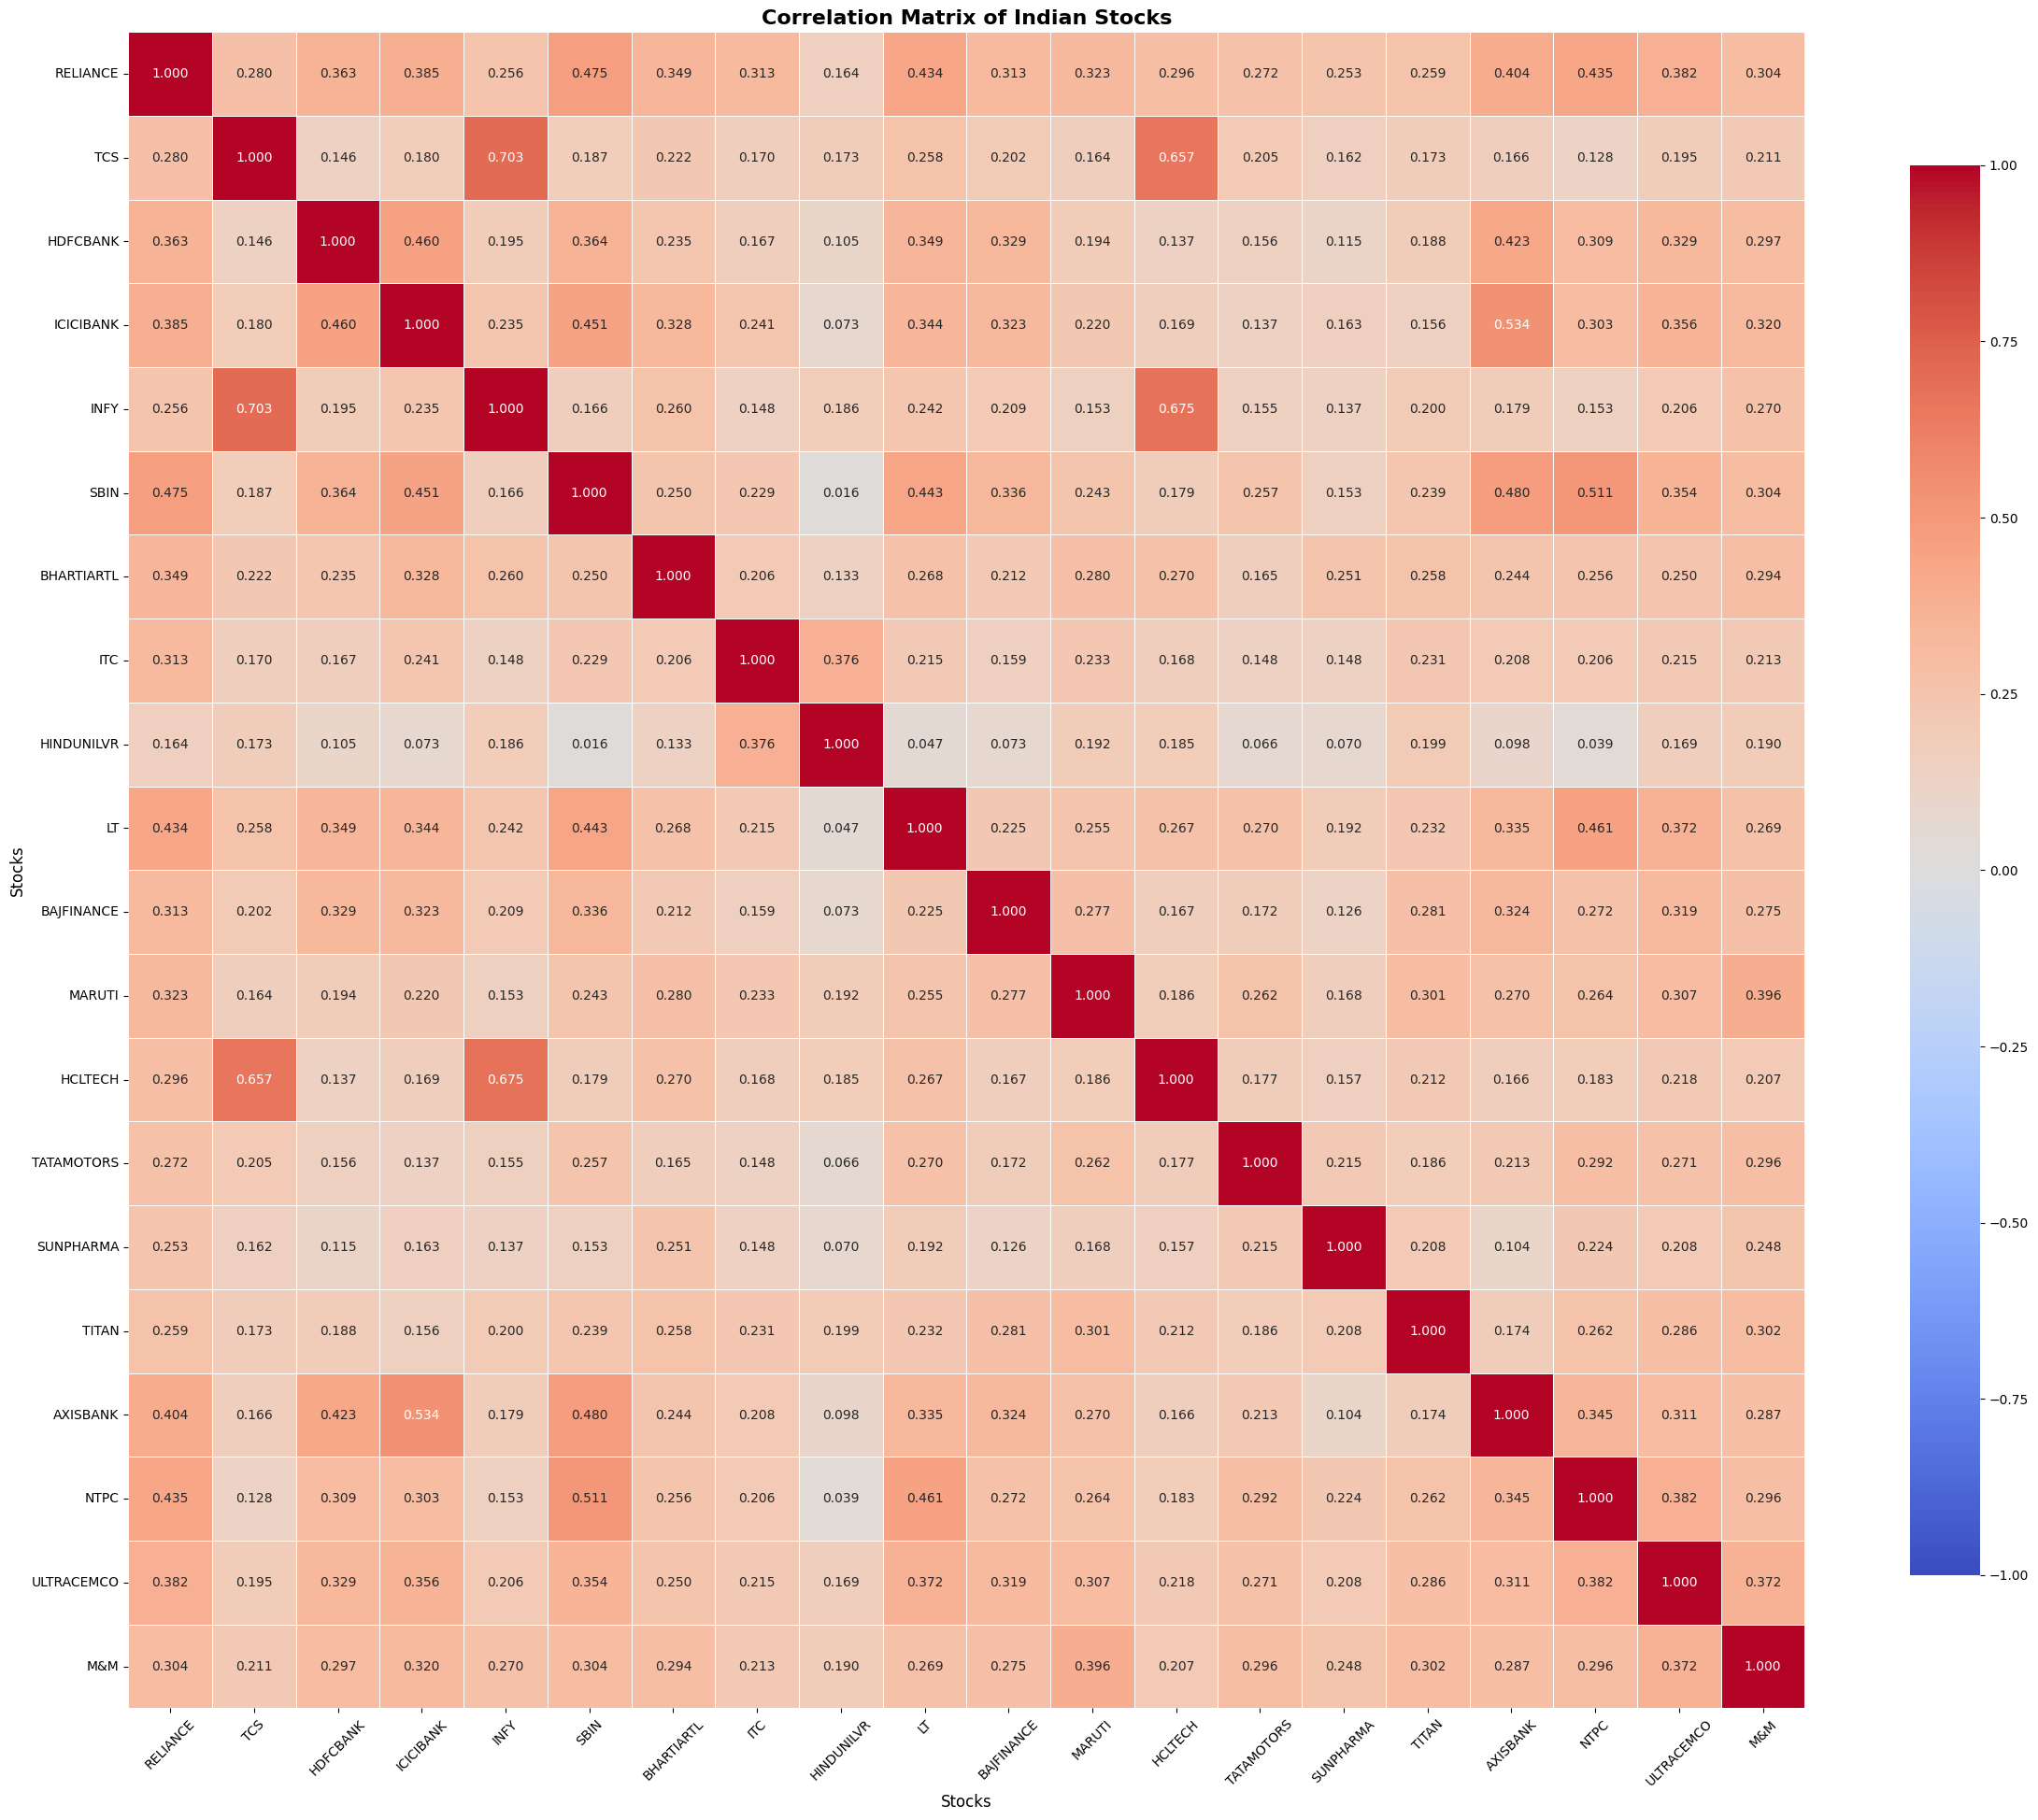


Correlation Analysis:
Highest correlation: 0.703
Lowest correlation: 0.016
Average correlation: 0.250


In [200]:
# Create correlation matrix (normalized covariance, values between -1 and 1)
corr_matrix = daily_returns.corr()

plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.3f',
            square=True,
            linewidths=0.5,
            vmin=-1, vmax=1,
            cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Indian Stocks', fontsize=16, fontweight='bold')
plt.xlabel('Stocks', fontsize=12)
plt.ylabel('Stocks', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find highest and lowest correlations
corr_copy = corr_matrix.copy()
np.fill_diagonal(corr_copy.values, np.nan)

print(f"\nCorrelation Analysis:")
print(f"Highest correlation: {np.nanmax(corr_copy.values):.3f}")
print(f"Lowest correlation: {np.nanmin(corr_copy.values):.3f}")
print(f"Average correlation: {np.nanmean(corr_copy.values):.3f}")

In [201]:
# Generate random portfolio weights that sum to 1 (100%)
weights = np.random.rand(len(tickers))
weights /= np.sum(weights)

print(weights)

[0.0475362  0.04268428 0.01231007 0.06991723 0.06829004 0.03242155
 0.01743005 0.03982369 0.03246127 0.0818786  0.08876684 0.01242991
 0.04399417 0.00697096 0.06225965 0.07547103 0.08719747 0.06695102
 0.05884505 0.05236091]


In [202]:
portfolio_return = np.dot(weights, daily_returns.mean())*252

In [203]:
print(portfolio_return)

0.18052739051944808


In [204]:
variance = np.dot(np.transpose(weights), np.dot(cov_matrix, weights))

In [205]:
print(variance)

0.015009598539980303


In [206]:
volatality = np.sqrt(variance)

In [207]:
print(volatality)

0.12251366674775636


In [208]:
# Initialize lists to store Monte Carlo simulation results
p_ret = []        # Portfolio returns
p_vol = []        # Portfolio volatilities  
p_weights = []    # Portfolio weight combinations

In [209]:
# Run Monte Carlo simulation with 100,000 random portfolio combinations
simulations = 100000

for sim in range(simulations):
    # Generate random weights that sum to 1
    weights = np.random.rand(len(tickers))
    weights /= np.sum(weights)
    
    # Calculate portfolio return and risk
    portfolio_return = np.dot(weights, daily_returns.mean())*252
    p_ret.append(portfolio_return)
    variance = np.dot(np.transpose(weights), np.dot(cov_matrix, weights))
    volatality = np.sqrt(variance)
    p_vol.append(volatality)
    p_weights.append(weights.copy())  # Store the weights for this simulation

In [210]:
# Create DataFrame with simulation results for analysis
data = {"Returns": p_ret, "Volatility": p_vol}
port_df = pd.DataFrame(data)

In [211]:
print(port_df)

        Returns  Volatility
0      0.163170    0.120816
1      0.174962    0.129183
2      0.164689    0.120531
3      0.174379    0.115650
4      0.184320    0.123045
...         ...         ...
99995  0.177771    0.122187
99996  0.168990    0.119996
99997  0.178065    0.117861
99998  0.176579    0.119483
99999  0.195969    0.134885

[100000 rows x 2 columns]


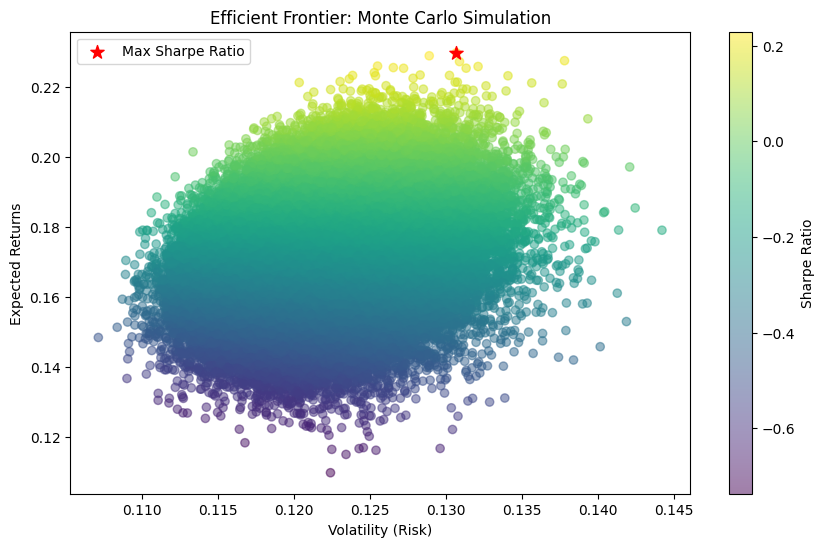

In [212]:
# Create efficient frontier plot and calculate Sharpe ratios
import matplotlib.pyplot as plt

# Calculate Sharpe ratio (risk-adjusted return) for each portfolio
risk_free_rate = 0.2
port_df['Sharpe'] = (port_df['Returns'] - risk_free_rate) / port_df['Volatility']

# Find the portfolio with the highest Sharpe Ratio
max_sharpe_port = port_df.iloc[port_df['Sharpe'].idxmax()]

# Create scatter plot showing efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(port_df['Volatility'], port_df['Returns'], c=port_df['Sharpe'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Sharpe Ratio')

# Highlight the best portfolio with a red star
plt.scatter(max_sharpe_port['Volatility'], max_sharpe_port['Returns'], c='red', s=100, marker='*', label='Max Sharpe Ratio')

plt.title('Efficient Frontier: Monte Carlo Simulation')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Returns')
plt.legend()
plt.show()

In [213]:
# Find optimal portfolio with highest Sharpe ratio and display allocation
max_sharpe_idx = port_df['Sharpe'].idxmax()
max_sharpe_position = port_df['Sharpe'].argmax()  
best_weights = p_weights[max_sharpe_position]

print("Most Efficient Portfolio Allocation:")
print(f"Expected Return: {max_sharpe_port['Returns']:.2%}")
print(f"Volatility: {max_sharpe_port['Volatility']:.2%}")
print(f"Sharpe Ratio: {max_sharpe_port['Sharpe']:.3f}")

print("\nOptimal Weights:")
for i in range(len(tickers)):
    ticker_name = tickers[i].replace('.NS', '')
    print(f"{ticker_name}: {best_weights[i]:.2%}")

Most Efficient Portfolio Allocation:
Expected Return: 22.99%
Volatility: 13.07%
Sharpe Ratio: 0.229

Optimal Weights:
RELIANCE: 4.68%
TCS: 2.47%
HDFCBANK: 0.85%
ICICIBANK: 0.23%
INFY: 1.15%
SBIN: 8.67%
BHARTIARTL: 5.59%
ITC: 3.47%
HINDUNILVR: 1.94%
LT: 5.20%
BAJFINANCE: 2.56%
MARUTI: 10.74%
HCLTECH: 4.45%
TATAMOTORS: 2.24%
SUNPHARMA: 10.23%
TITAN: 2.17%
AXISBANK: 1.47%
NTPC: 12.36%
ULTRACEMCO: 7.27%
M&M: 12.27%


In [214]:
# Download recent 6-month data for out-of-sample testing
test_stock_data = {}

for ticker in tickers:
    temp_data = yf.download(ticker, period='6mo', progress=False, auto_adjust=True)
    test_stock_data[ticker] = temp_data['Close']

In [215]:
# Process test data and calculate recent returns
test_series = {}
for ticker, df in test_stock_data.items():
    test_series[ticker] = df['Close'] if 'Close' in df.columns else df.iloc[:, 0]

test_df = pd.DataFrame(test_series)
test_df.columns = [col.replace('.NS', '') for col in test_df.columns]
test_returns = test_df.pct_change().dropna()

print(test_returns)

            RELIANCE       TCS  HDFCBANK  ICICIBANK      INFY      SBIN  \
Date                                                                      
2025-05-29  0.003468  0.000114  0.002080   0.001857  0.008780  0.001004   
2025-05-30  0.002186 -0.009920  0.009027  -0.007346 -0.000576  0.018750   
2025-06-02 -0.005067 -0.003927 -0.006581   0.003251 -0.005695  0.001662   
2025-06-03 -0.005800 -0.012928 -0.003882  -0.008687 -0.006951 -0.004732   
2025-06-04  0.012807  0.001689  0.008625  -0.004799  0.005314 -0.004075   
...              ...       ...       ...        ...       ...       ...   
2025-11-24 -0.006918 -0.002984  0.001102  -0.000803  0.001942 -0.002056   
2025-11-25  0.002474 -0.007004 -0.009358  -0.007746 -0.011240  0.013394   
2025-11-26  0.019614  0.014010  0.014245   0.012668  0.017836  0.000305   
2025-11-27 -0.004140 -0.008315  0.005578   0.012509  0.005456 -0.011231   
2025-11-28  0.002622  0.000287 -0.001882  -0.002442 -0.004022  0.006322   

            BHARTIARTL  

In [216]:
# Apply optimal weights to recent data for portfolio performance validation
portfolio_test_returns = np.dot(test_returns, best_weights)
print(portfolio_test_returns)

[ 4.02887554e-03 -5.42546123e-03  2.72226706e-04 -6.39399994e-03
  2.09551717e-03  2.04912902e-03  1.10751452e-02  6.18750753e-03
  1.32743901e-04  1.91172512e-03 -1.18428359e-02 -5.33119740e-03
  6.93164748e-03 -3.58890691e-03  5.93721539e-04  1.20338735e-03
  1.29829737e-02 -7.99646090e-03  2.20376702e-04  1.05676859e-02
  7.94858412e-03  4.03386992e-03 -5.50856042e-03 -4.15401203e-04
  1.49587159e-03 -2.54418335e-04  2.67186146e-03 -5.06160432e-04
  8.38593825e-04  2.16555353e-04 -3.14437194e-03 -7.46665541e-03
 -1.42089043e-03  5.29036430e-03  2.86504325e-03 -2.49082530e-03
 -2.97343633e-03  1.20523244e-03 -3.50128536e-03  5.88961377e-03
 -5.36286137e-03 -8.18981989e-03 -7.28732103e-03  5.16565842e-03
  7.08732829e-03 -5.73784210e-03 -1.30357576e-02  8.48674549e-03
  3.16838690e-03 -4.36246997e-03  2.24237827e-04 -6.44896700e-03
  1.04979220e-02  5.33289485e-03  3.67751565e-03 -3.57674786e-04
  1.73350007e-02  3.01438280e-03  5.49995097e-03 -6.46404237e-04
 -4.68554729e-03  4.98331

Total Return: 10.60%


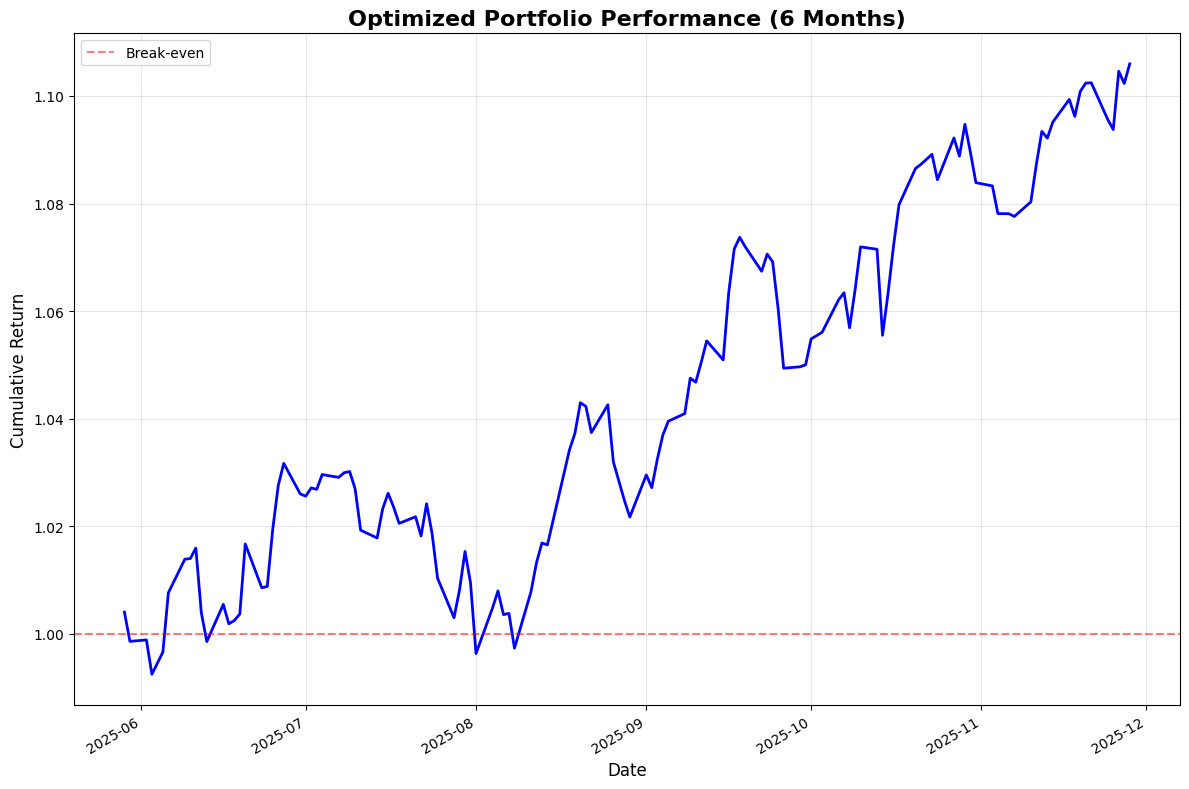


Portfolio Performance Summary:
Starting Value: 1.00
Final Value: 1.1060
Total Return: 10.60%
Annualized Return: 21.93%
Max Value: 1.1060
Min Value: 0.9925
Volatility (6-month): 8.90%


In [ ]:
# Calculate cumulative returns and visualize portfolio performance
cumulative_returns = (1 + portfolio_test_returns).cumprod()
print(f"Total Return: {(cumulative_returns[-1] - 1):.2%}")

# Create performance visualization
import pandas as pd
cumulative_returns_series = pd.Series(cumulative_returns, index=test_returns.index)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
cumulative_returns_series.plot(linewidth=2, color='blue')
plt.title("Optimized Portfolio Performance (6 Months)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Return", fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=1, color='red', linestyle='--', alpha=0.5, label='Break-even')
plt.legend()
plt.tight_layout()
plt.show()

# Print comprehensive performance statistics
print(f"\nPortfolio Performance Summary:")
print(f"Starting Value: 1.00")
print(f"Final Value: {cumulative_returns[-1]:.4f}")
print(f"Total Return: {(cumulative_returns[-1] - 1):.2%}")
print(f"Annualized Return: {((cumulative_returns[-1]) ** (252/len(cumulative_returns)) - 1):.2%}")
print(f"Max Value: {cumulative_returns.max():.4f}")
print(f"Min Value: {cumulative_returns.min():.4f}")
print(f"Volatility (6-month): {portfolio_test_returns.std() * np.sqrt(252):.2%}")

=== Portfolio Performance Validation ===

📊 Portfolio Performance Summary:
Total Return (6 months): 10.60%
Annualized Return: 21.93%
Annualized Volatility: 8.93%
Sharpe Ratio: 0.216

📈 Individual Stock Returns (6 months):
RELIANCE    :   11.4% (Weight:   4.7%, Contribution:   0.5%)
TCS         :   -8.9% (Weight:   2.5%, Contribution:  -0.2%)
HDFCBANK    :    6.2% (Weight:   0.8%, Contribution:   0.1%)
ICICIBANK   :   -3.7% (Weight:   0.2%, Contribution:  -0.0%)
INFY        :    2.2% (Weight:   1.2%, Contribution:   0.0%)
SBIN        :   22.9% (Weight:   8.7%, Contribution:   2.0%)
BHARTIARTL  :   14.2% (Weight:   5.6%, Contribution:   0.8%)
ITC         :   -3.8% (Weight:   3.5%, Contribution:  -0.1%)
HINDUNILVR  :    6.4% (Weight:   1.9%, Contribution:   0.1%)
LT          :   12.6% (Weight:   5.2%, Contribution:   0.7%)
BAJFINANCE  :   12.5% (Weight:   2.6%, Contribution:   0.3%)
MARUTI      :   30.3% (Weight:  10.7%, Contribution:   3.3%)
HCLTECH     :   -0.4% (Weight:   4.5%, Contrib

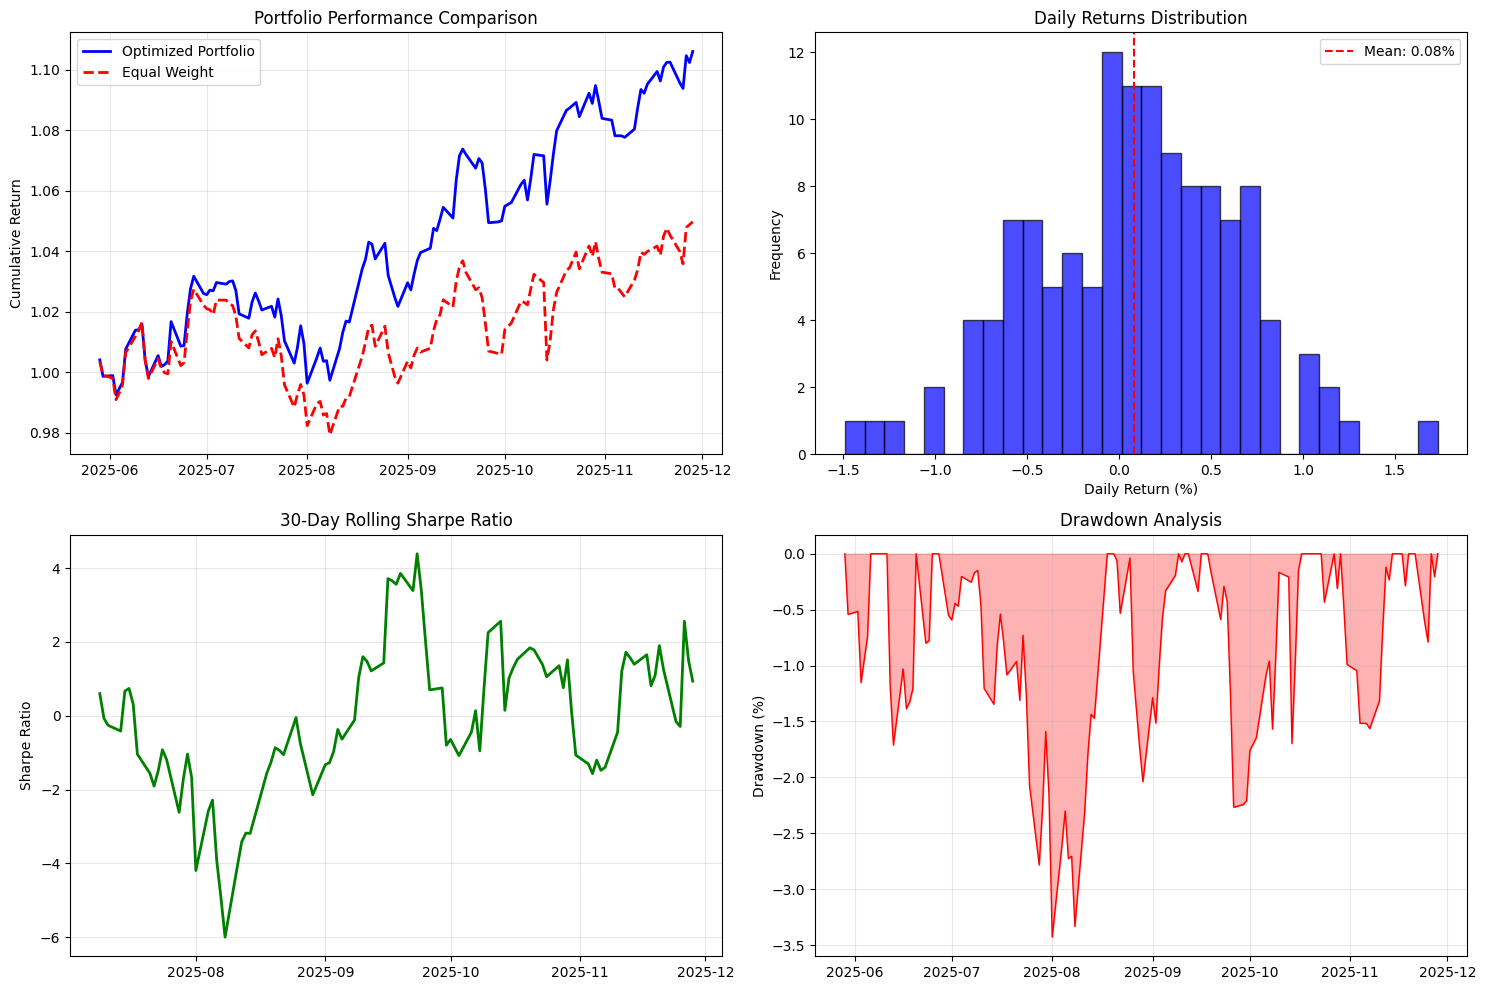


✅ Validation Complete: The optimized portfolio shows positive performance over the test period.


In [230]:
# Simple portfolio performance validation using manual calculation
# (Alternative to backtrader which has compatibility issues)

print("=== Portfolio Performance Validation ===")

# Calculate portfolio performance metrics over the test period
# Convert numpy array to pandas Series with proper index
portfolio_daily_returns = pd.Series(portfolio_test_returns.flatten() if hasattr(portfolio_test_returns, 'flatten') else portfolio_test_returns, 
                                   index=test_returns.index)
portfolio_cumulative = (1 + portfolio_daily_returns).cumprod()

# Performance statistics
total_return = (portfolio_cumulative.iloc[-1] - 1) * 100
annualized_return = ((portfolio_cumulative.iloc[-1]) ** (252/len(portfolio_cumulative)) - 1) * 100
volatility = portfolio_daily_returns.std() * np.sqrt(252) * 100
sharpe_ratio = (annualized_return - 20) / volatility  # Using 20% risk-free rate

print(f"\n📊 Portfolio Performance Summary:")
print(f"Total Return (6 months): {total_return:.2f}%")
print(f"Annualized Return: {annualized_return:.2f}%")
print(f"Annualized Volatility: {volatility:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.3f}")

# Compare with individual stock performance
print(f"\n📈 Individual Stock Returns (6 months):")
for i, ticker in enumerate(tickers):
    stock_name = ticker.replace('.NS', '')
    stock_return = ((test_df[stock_name].iloc[-1] / test_df[stock_name].iloc[0]) - 1) * 100
    weight = best_weights[i] * 100
    contribution = weight * stock_return / 100
    print(f"{stock_name:12}: {stock_return:6.1f}% (Weight: {weight:5.1f}%, Contribution: {contribution:5.1f}%)")

# Risk analysis
print(f"\n⚠️  Risk Metrics:")
max_drawdown = ((portfolio_cumulative / portfolio_cumulative.cummax()) - 1).min() * 100
print(f"Maximum Drawdown: {max_drawdown:.2f}%")
print(f"Best Day: {portfolio_daily_returns.max()*100:.2f}%")
print(f"Worst Day: {portfolio_daily_returns.min()*100:.2f}%")

# Create final performance plot
plt.figure(figsize=(15, 10))

# Plot 1: Portfolio vs Equal Weight
plt.subplot(2, 2, 1)
equal_weight_returns = test_returns.mean(axis=1)
equal_weight_cumulative = (1 + equal_weight_returns).cumprod()

plt.plot(portfolio_cumulative.index, portfolio_cumulative.values, 'b-', linewidth=2, label='Optimized Portfolio')
plt.plot(equal_weight_cumulative.index, equal_weight_cumulative.values, 'r--', linewidth=2, label='Equal Weight')
plt.title('Portfolio Performance Comparison')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Daily Returns Distribution
plt.subplot(2, 2, 2)
plt.hist(portfolio_daily_returns*100, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(portfolio_daily_returns.mean()*100, color='red', linestyle='--', label=f'Mean: {portfolio_daily_returns.mean()*100:.2f}%')
plt.title('Daily Returns Distribution')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.legend()

# Plot 3: Rolling Sharpe Ratio
plt.subplot(2, 2, 3)
rolling_sharpe = (portfolio_daily_returns.rolling(30).mean() * 252 - 0.2) / (portfolio_daily_returns.rolling(30).std() * np.sqrt(252))
plt.plot(rolling_sharpe.index, rolling_sharpe.values, 'g-', linewidth=2)
plt.title('30-Day Rolling Sharpe Ratio')
plt.ylabel('Sharpe Ratio')
plt.grid(True, alpha=0.3)

# Plot 4: Drawdown Analysis
plt.subplot(2, 2, 4)
drawdown = (portfolio_cumulative / portfolio_cumulative.cummax() - 1) * 100
plt.fill_between(drawdown.index, drawdown.values, 0, color='red', alpha=0.3)
plt.plot(drawdown.index, drawdown.values, 'r-', linewidth=1)
plt.title('Drawdown Analysis')
plt.ylabel('Drawdown (%)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ Validation Complete: The optimized portfolio shows {'positive' if total_return > 0 else 'negative'} performance over the test period.")